In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
loan_train = pd.read_csv('./data/Train/Train.csv', index_col='ID')

In [4]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87020 entries, ID000002C20 to ID124821V10
Data columns (total 25 columns):
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null float64
Filled_Form              870

In [5]:
loan_train.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
ID,,,,,,,,,,,,,,,,,,,,,
ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000,5,0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000,2,0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000,4,0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000,5,0,BIHAR GOVERNMENT,State Bank of India,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000,2,25000,GLOBAL EDGE SOFTWARE,HDFC Bank,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [6]:
loan_train.Disbursed.value_counts()

0    85747
1     1273
dtype: int64

**Highly imbalanced dataset, need to have smart strategy to solve this problem.**

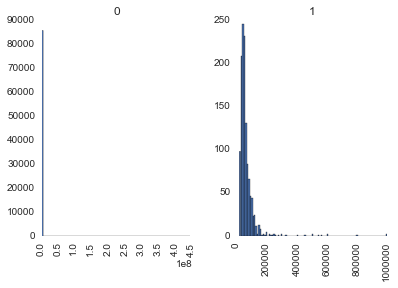

In [8]:
loan_train.hist(column='Monthly_Income', by='Disbursed', bins=100);

In [9]:
loan_train.groupby('Disbursed')[['Monthly_Income']].describe()

Monthly_Income
Disbursed                      
0         count    8.574700e+04
          mean     5.879198e+04
          std      2.193598e+06
          min      0.000000e+00
          25%      1.640000e+04
          50%      2.500000e+04
          75%      4.000000e+04
          max      4.445544e+08
1         count    1.273000e+03
          mean     6.275639e+04
          std      7.276032e+04
          min      1.500000e+04
          25%      3.500000e+04
          50%      4.800000e+04
          75%      7.000000e+04
          max      1.000000e+06

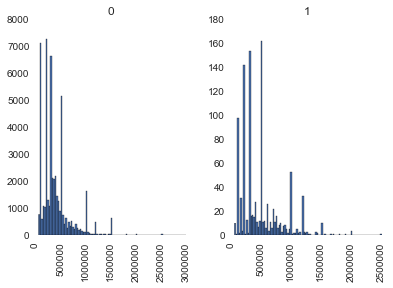

In [12]:
loan_train.hist(column='Loan_Amount_Submitted', by='Disbursed', bins=100);

In [16]:
loan_train['loan_to_income_ratio'] = (loan_train.Loan_Amount_Submitted / loan_train.Monthly_Income)

In [21]:
loan_train.loan_to_income_ratio.fillna(0, inplace=True)

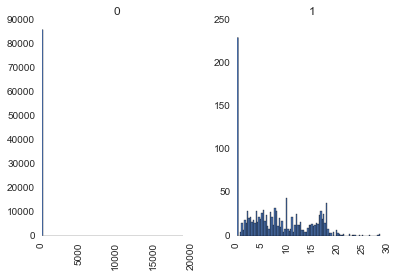

In [22]:
loan_train.hist(column='loan_to_income_ratio', by='Disbursed', bins=100);

In [23]:
loan_train[loan_train.Disbursed == 0]['loan_to_income_ratio'].describe()

count    85747.000000
mean         7.461545
std         80.986306
min          0.000000
25%          0.000000
50%          5.000000
75%         14.400000
max      18846.153846
Name: loan_to_income_ratio, dtype: float64

In [25]:
loan_train[loan_train.Disbursed == 1]['loan_to_income_ratio'].describe()

count    1273.000000
mean        7.874873
std         6.292626
min         0.000000
25%         2.380952
50%         6.909091
75%        12.734528
max        28.620690
Name: loan_to_income_ratio, dtype: float64

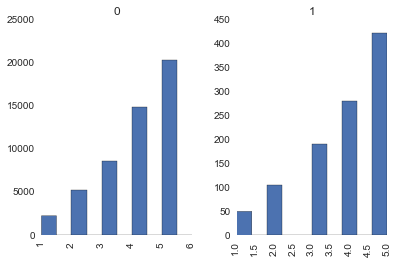

In [26]:
loan_train.hist(column='Loan_Tenure_Submitted', by='Disbursed');

In [27]:
loan_train['diff_in_term'] = loan_train['Loan_Tenure_Applied'] - loan_train['Loan_Tenure_Submitted']

In [30]:
loan_train.diff_in_term.fillna(0, inplace=True)

In [31]:
loan_train.diff_in_term.head()

ID
ID000002C20    0
ID000004E40    0
ID000007H20    0
ID000008I30    0
ID000009J40    0
Name: diff_in_term, dtype: float64

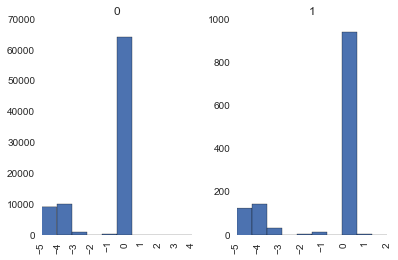

In [33]:
loan_train.hist(column='diff_in_term', by='Disbursed');

In [34]:
loan_train['diff_in_amount'] = loan_train['Loan_Amount_Applied'] - loan_train['Loan_Amount_Submitted']
loan_train.diff_in_amount.fillna(0, inplace=True)

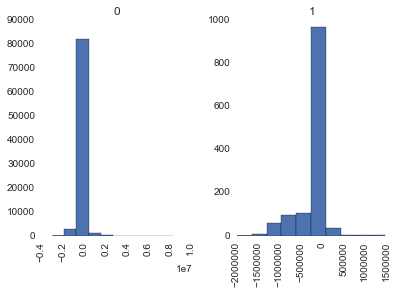

In [35]:
loan_train.hist(column='diff_in_amount', by='Disbursed');

In [56]:
g = loan_train.groupby(['Salary_Account', 'Disbursed']).size()

In [66]:
h = g.unstack()

In [67]:
h[1].fillna(0, inplace=True)

In [68]:
h['percent_disbursed'] = (h[1] / (h[1] + h[0])) * 100.0

In [70]:
h.percent_disbursed.order(ascending=False).head()

Salary_Account
Catholic Syrian Bank     7.142857
Deutsche Bank            4.000000
HSBC                     3.963415
The Ratnakar Bank Ltd    3.614458
State Bank of Patiala    2.824859
Name: percent_disbursed, dtype: float64

In [71]:
h.ix['Catholic Syrian Bank']

Disbursed
0                    13.000000
1                     1.000000
percent_disbursed     7.142857
Name: Catholic Syrian Bank, dtype: float64

In [72]:
h.ix['Deutsche Bank']

Disbursed
0                    120
1                      5
percent_disbursed      4
Name: Deutsche Bank, dtype: float64

In [76]:
loan_train.Disbursed.value_counts().argmax()

0

In [77]:
loan_test = pd.read_csv('./data/Test/Test.csv', index_col='ID')

In [87]:
%run scripts/baseline.py

In [88]:
baseline_submission = baseline_prediction(loan_train, loan_test)

In [91]:
submission = pd.DataFrame({'ID': loan_test.index.values, 'Disbursed': baseline_submission})

In [92]:
submission.to_csv('./submissions/baseline.csv', index=False)